In [1]:
import pandas as pd
import numpy as np

In [2]:
salaries = pd.read_csv("global_tech_salary.csv")

In [3]:
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
4995,2023,SE,FT,Machine Learning Infrastructure Engineer,70000,EUR,75577,FR,100,FR,M
4996,2022,SE,FT,Data Engineer,145000,USD,145000,US,0,US,M
4997,2024,SE,FT,Machine Learning Engineer,153000,USD,153000,US,0,US,M
4998,2022,EN,FT,AI Scientist,30000,EUR,31520,PT,100,ES,M


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

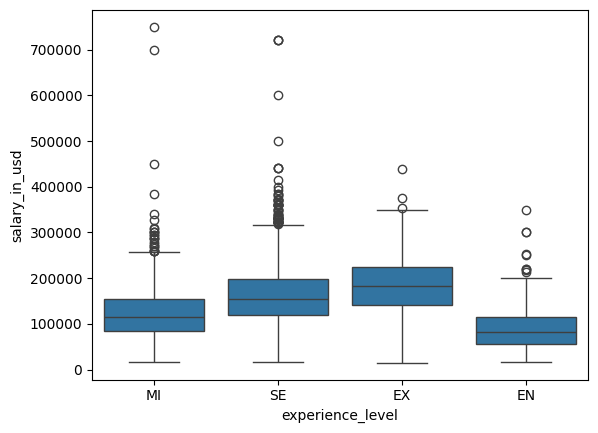

In [5]:
sns.boxplot(salaries, x="experience_level", y="salary_in_usd")

In [6]:
salaries[salaries["experience_level"] == "MI"].max()

work_year                           2024
experience_level                      MI
employment_type                       FT
job_title             Sales Data Analyst
salary                           8500000
salary_currency                      USD
salary_in_usd                     750000
employee_residence                    VN
remote_ratio                         100
company_location                      VN
company_size                           S
dtype: object

In [7]:
salaries['job_title'].value_counts()

job_title
Data Engineer                 1067
Data Scientist                1025
Data Analyst                   735
Machine Learning Engineer      511
Research Scientist             153
                              ... 
Data Quality Engineer            1
Principal Data Analyst           1
Data Integration Developer       1
Lead Data Analyst                1
Data Modeller                    1
Name: count, Length: 123, dtype: int64

In [8]:
one_job = pd.DataFrame(salaries['job_title'].value_counts())

In [9]:
top_4 = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer']

In [10]:
salaries = salaries[salaries['job_title'].isin(top_4)]

In [11]:
len(one_job[one_job['count'] < 10])

88

In [12]:
salaries['company_location'].value_counts()

company_location
US    2956
GB     142
CA      71
ES      41
DE      19
FR      12
AU       9
IN       9
NL       6
IE       6
PL       5
BR       5
PT       5
LT       5
EG       4
EE       4
SI       3
MX       3
CO       3
AR       3
VN       3
IT       2
BE       2
AT       2
ZA       2
GR       2
CF       2
MY       1
JP       1
MT       1
PH       1
EC       1
AE       1
LV       1
AM       1
TR       1
TH       1
NG       1
LU       1
Name: count, dtype: int64

In [13]:
salaries = salaries[salaries['company_location'] == 'US']

In [14]:
salaries['company_location'].value_counts()

company_location
US    2956
Name: count, dtype: int64

In [15]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder

In [17]:
selected_job = "Data Scientist"
salaries = salaries[salaries['job_title'] == selected_job]
len(salaries)

655

In [18]:
salaries.head()

salaries.drop('salary_currency', axis=1, inplace=True)
salaries.drop('employee_residence', axis=1, inplace=True)
salaries.drop('salary', axis=1, inplace=True)
salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
1,2023,MI,FT,Data Analyst,70000,100,US,M
11,2023,SE,FT,Data Analyst,85000,0,US,M
37,2023,SE,FT,Data Analyst,136000,100,US,M
40,2023,MI,FT,Data Analyst,105000,0,US,M
48,2024,SE,FT,Data Analyst,165000,100,US,M


In [19]:
categorical_feats = ['work_year','experience_level','employment_type','job_title','remote_ratio','company_location','company_size']
salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
1,2023,MI,FT,Data Analyst,70000,100,US,M
11,2023,SE,FT,Data Analyst,85000,0,US,M
37,2023,SE,FT,Data Analyst,136000,100,US,M
40,2023,MI,FT,Data Analyst,105000,0,US,M
48,2024,SE,FT,Data Analyst,165000,100,US,M


In [20]:
from pandas import get_dummies
salaries = get_dummies(salaries, columns=categorical_feats)

In [21]:
X = salaries.drop('salary_in_usd', axis=1)
y = salaries['salary_in_usd']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=18)

In [23]:
linear_model = LinearRegression()

In [24]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [25]:
predictions = linear_model.predict(X_test)

In [26]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [27]:
results = root_mean_squared_error(y_test, predictions)

In [28]:
print(results)

35692.154619288674


In [29]:
mae = mean_absolute_error(y_test, predictions)

In [30]:
print(mae)

26643.613181616023


In [31]:
new_row = {

}